<a href="https://colab.research.google.com/github/yjq349825834/computer-vision-with-embedded-machine-learning/blob/master/Copy_of_ei_saliency_and_grad_cam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saliency and Grad-CAM Examples

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShawnHymel/computer-vision-with-embedded-machine-learning/blob/master/2.3.1%20-%20CNN%20Visualizations/ei_saliency_and_grad_cam.ipynb)

Import a trained model (.zip file) from Edge Impulse and copy in post-processed features of a single sample image. Run the notebook to see a saliency map and Grad-CAM heatmap.

Saliency maps highlight which pixels in the input image were most important (i.e. most salient) in the decision making process.

Grad-CAM looks at the output feature map of the final convolution layer to figure out which areas of the image were the most important in the decision making process.

Author: EdgeImpulse, Inc.<br>
Date: June 19, 2021<br>
License: [Apache-2.0](apache.org/licenses/LICENSE-2.0)<br>

In [ ]:
import numpy as np

import tensorflow as tf
from keras import activations, layers, models, backend

import cv2

import matplotlib.pyplot as plt

In [ ]:
### Unzip model

# Change this based on your .zip model filename
model_zip_path = "/content/ei-coin-recog-cnn-nn-classifier-tensorflow-savedmodel-model.zip"

# Unzip in place
!unzip "{model_zip_path}"

Archive:  /content/ei-coin-recog-cnn-nn-classifier-tensorflow-savedmodel-model.zip
   creating: saved_model/
   creating: saved_model/assets/
   creating: saved_model/variables/
  inflating: saved_model/saved_model.pb  
  inflating: saved_model/keras_metadata.pb  
  inflating: saved_model/variables/variables.index  
  inflating: saved_model/variables/variables.data-00000-of-00001  


In [ ]:
### Settings

# Image resolution
width = 48
height = 48

# Labels
labels = ["background", "half", "one", "pointone", "two"]

# Paste ground processed features from Edge Impulse and set ground-truth label
img = [0.6679, 0.6682, 0.6615, 0.6574, 0.6546, 0.6486, 0.6495, 0.6447, 0.6408, 0.6330, 0.6295, 0.6260, 0.6221, 0.6173, 0.6173, 0.6094, 0.6075, 0.6055, 0.6016, 0.6025, 0.5997, 0.5937, 0.5909, 0.5801, 0.5722, 0.5730, 0.5753, 0.5773, 0.5762, 0.5741, 0.5753, 0.5734, 0.5674, 0.5702, 0.5663, 0.5711, 0.5702, 0.5663, 0.5663, 0.5633, 0.5628, 0.5663, 0.5624, 0.5633, 0.5584, 0.5584, 0.5584, 0.5582, 0.6679, 0.6655, 0.6585, 0.6537, 0.6546, 0.6498, 0.6475, 0.6447, 0.6417, 0.6330, 0.6299, 0.6256, 0.6221, 0.6221, 0.6182, 0.6133, 0.6142, 0.6114, 0.6064, 0.6016, 0.6016, 0.5969, 0.5958, 0.5863, 0.5820, 0.5672, 0.5633, 0.5785, 0.5781, 0.5773, 0.5789, 0.5741, 0.5702, 0.5690, 0.5663, 0.5679, 0.5663, 0.5702, 0.5667, 0.5663, 0.5663, 0.5624, 0.5624, 0.5663, 0.5624, 0.5624, 0.5589, 0.5628, 0.6640, 0.6585, 0.6546, 0.6502, 0.6507, 0.6467, 0.6428, 0.6417, 0.6378, 0.6290, 0.6256, 0.6212, 0.6221, 0.6182, 0.6142, 0.6138, 0.6182, 0.6103, 0.6103, 0.6020, 0.6025, 0.5986, 0.5986, 0.5937, 0.5903, 0.5711, 0.5663, 0.5829, 0.5789, 0.5778, 0.5750, 0.5711, 0.5711, 0.5633, 0.5593, 0.5584, 0.5663, 0.5663, 0.5663, 0.5667, 0.5624, 0.5624, 0.5624, 0.5624, 0.5624, 0.5589, 0.5628, 0.5633, 0.6629, 0.6585, 0.6546, 0.6523, 0.6507, 0.6417, 0.6417, 0.6417, 0.6373, 0.6290, 0.6224, 0.6228, 0.6216, 0.5977, 0.5986, 0.6150, 0.6142, 0.6103, 0.6103, 0.6064, 0.6064, 0.6064, 0.6016, 0.5977, 0.5946, 0.5829, 0.5789, 0.5868, 0.5794, 0.5750, 0.5741, 0.5707, 0.5746, 0.5679, 0.5584, 0.5584, 0.5624, 0.5624, 0.5663, 0.5663, 0.5624, 0.5624, 0.5624, 0.5624, 0.5584, 0.5624, 0.5624, 0.5575, 0.6590, 0.6624, 0.6546, 0.6456, 0.6467, 0.6417, 0.6378, 0.6378, 0.6338, 0.6251, 0.6212, 0.6233, 0.6142, 0.6094, 0.6133, 0.6212, 0.6216, 0.6173, 0.6161, 0.6182, 0.6221, 0.6290, 0.6256, 0.6260, 0.6198, 0.6059, 0.6055, 0.5986, 0.5829, 0.5741, 0.5707, 0.5707, 0.5702, 0.5624, 0.5628, 0.5593, 0.5545, 0.5584, 0.5633, 0.5633, 0.5624, 0.5624, 0.5624, 0.5628, 0.5589, 0.5584, 0.5550, 0.5550, 0.6624, 0.6507, 0.6467, 0.6444, 0.6467, 0.6428, 0.6350, 0.6299, 0.6260, 0.6212, 0.6212, 0.6212, 0.6173, 0.6173, 0.6279, 0.6318, 0.6385, 0.6412, 0.6459, 0.6588, 0.6392, 0.6171, 0.5961, 0.5804, 0.5573, 0.5513, 0.5635, 0.5843, 0.5898, 0.5820, 0.5707, 0.5702, 0.5702, 0.5663, 0.5652, 0.5624, 0.5510, 0.5515, 0.5584, 0.5554, 0.5545, 0.5628, 0.5624, 0.5593, 0.5573, 0.5566, 0.5593, 0.5554, 0.6624, 0.6546, 0.6507, 0.6484, 0.6467, 0.6389, 0.6299, 0.6299, 0.6299, 0.6251, 0.6256, 0.6201, 0.6212, 0.6338, 0.6436, 0.6581, 0.6872, 0.6831, 0.6242, 0.4798, 0.3894, 0.3256, 0.2870, 0.2602, 0.2486, 0.2424, 0.2565, 0.3280, 0.4476, 0.5510, 0.5868, 0.5762, 0.5702, 0.5672, 0.5633, 0.5582, 0.5506, 0.5467, 0.5510, 0.5515, 0.5561, 0.5566, 0.5584, 0.5584, 0.5584, 0.5589, 0.5550, 0.5550, 0.6546, 0.6507, 0.6507, 0.6467, 0.6350, 0.6299, 0.6315, 0.6299, 0.6251, 0.6221, 0.6251, 0.6279, 0.6401, 0.6486, 0.6789, 0.7002, 0.5815, 0.3870, 0.2303, 0.1645, 0.1740, 0.1709, 0.1515, 0.1490, 0.1619, 0.1878, 0.1517, 0.1658, 0.2187, 0.2883, 0.4249, 0.5589, 0.5863, 0.5702, 0.5624, 0.5578, 0.5506, 0.5506, 0.5432, 0.5510, 0.5584, 0.5522, 0.5545, 0.5554, 0.5510, 0.5515, 0.5550, 0.5545, 0.6467, 0.6456, 0.6389, 0.6401, 0.6366, 0.6299, 0.6299, 0.6299, 0.6251, 0.6251, 0.6251, 0.6456, 0.6569, 0.7031, 0.6694, 0.4229, 0.2039, 0.1476, 0.1382, 0.1776, 0.2629, 0.2086, 0.1832, 0.1707, 0.2773, 0.3108, 0.1823, 0.1612, 0.1693, 0.1742, 0.1857, 0.2928, 0.4835, 0.5848, 0.5702, 0.5667, 0.5550, 0.5522, 0.5467, 0.5397, 0.5510, 0.5504, 0.5499, 0.5515, 0.5499, 0.5543, 0.5545, 0.5504, 0.6433, 0.6416, 0.6401, 0.6338, 0.6331, 0.6338, 0.6361, 0.6343, 0.6281, 0.6299, 0.6408, 0.6494, 0.7037, 0.5865, 0.2902, 0.1276, 0.2372, 0.2680, 0.1972, 0.2023, 0.2036, 0.2136, 0.2054, 0.1644, 0.2731, 0.2412, 0.2005, 0.1554, 0.1870, 0.2014, 0.2029, 0.1862, 0.2094, 0.4079, 0.5730, 0.5711, 0.5575, 0.5504, 0.5455, 0.5374, 0.5515, 0.5499, 0.5495, 0.5522, 0.5534, 0.5538, 0.5515, 0.5506, 0.6449, 0.6428, 0.6428, 0.6389, 0.6311, 0.6311, 0.6311, 0.6288, 0.6299, 0.6334, 0.6378, 0.7003, 0.5619, 0.2094, 0.1696, 0.2794, 0.2591, 0.2241, 0.1987, 0.1888, 0.2084, 0.2390, 0.1814, 0.1434, 0.1650, 0.2049, 0.2052, 0.1631, 0.2100, 0.2245, 0.3153, 0.2171, 0.1841, 0.1702, 0.4201, 0.5750, 0.5554, 0.5506, 0.5476, 0.5397, 0.5515, 0.5550, 0.5554, 0.5545, 0.5515, 0.5554, 0.5543, 0.5527, 0.6467, 0.6410, 0.6428, 0.6389, 0.6350, 0.6350, 0.6271, 0.6306, 0.6295, 0.6378, 0.6809, 0.5824, 0.1955, 0.1340, 0.1893, 0.2565, 0.1862, 0.2167, 0.2042, 0.1852, 0.1748, 0.1415, 0.1440, 0.1415, 0.1282, 0.1272, 0.1468, 0.1545, 0.1485, 0.3230, 0.3405, 0.2280, 0.2425, 0.2046, 0.2138, 0.4678, 0.5584, 0.5471, 0.5476, 0.5397, 0.5506, 0.5515, 0.5554, 0.5515, 0.5515, 0.5515, 0.5554, 0.5510, 0.6424, 0.6389, 0.6389, 0.6350, 0.6311, 0.6311, 0.6283, 0.6311, 0.6378, 0.6609, 0.5924, 0.2461, 0.1345, 0.2302, 0.1240, 0.1355, 0.2097, 0.2122, 0.1782, 0.1781, 0.1468, 0.1349, 0.1501, 0.1236, 0.1048, 0.1110, 0.1115, 0.1156, 0.1424, 0.2091, 0.1735, 0.3018, 0.3230, 0.2082, 0.2093, 0.2767, 0.5153, 0.5476, 0.5358, 0.5393, 0.5471, 0.5476, 0.5476, 0.5515, 0.5515, 0.5504, 0.5515, 0.5504, 0.6389, 0.6350, 0.6350, 0.6271, 0.6232, 0.6271, 0.6271, 0.6311, 0.6495, 0.6609, 0.3540, 0.1435, 0.2387, 0.2802, 0.2207, 0.1629, 0.1945, 0.1770, 0.1734, 0.1722, 0.1780, 0.1669, 0.1505, 0.1350, 0.1237, 0.1233, 0.1115, 0.0967, 0.0891, 0.0987, 0.1558, 0.2868, 0.2165, 0.2161, 0.2502, 0.2052, 0.3726, 0.5476, 0.5319, 0.5437, 0.5515, 0.5515, 0.5515, 0.5515, 0.5515, 0.5515, 0.5476, 0.5476, 0.6331, 0.6315, 0.6331, 0.6292, 0.6271, 0.6271, 0.6292, 0.6350, 0.6731, 0.5308, 0.1872, 0.1774, 0.2859, 0.2650, 0.2509, 0.1815, 0.2702, 0.2696, 0.2348, 0.3186, 0.4020, 0.1772, 0.1231, 0.1145, 0.0994, 0.1073, 0.1154, 0.0997, 0.0868, 0.0801, 0.1106, 0.1221, 0.2665, 0.2476, 0.1523, 0.2095, 0.2251, 0.4682, 0.5397, 0.5437, 0.5476, 0.5515, 0.5515, 0.5476, 0.5476, 0.5499, 0.5476, 0.5448, 0.6350, 0.6315, 0.6303, 0.6253, 0.6288, 0.6276, 0.6292, 0.6472, 0.6588, 0.3470, 0.1458, 0.2141, 0.1735, 0.2165, 0.1615, 0.1168, 0.2706, 0.4395, 0.3779, 0.4346, 0.2461, 0.1384, 0.1275, 0.1055, 0.1064, 0.0958, 0.0882, 0.0871, 0.0958, 0.0880, 0.0969, 0.1109, 0.1901, 0.1822, 0.1815, 0.1619, 0.1862, 0.3260, 0.5280, 0.5437, 0.5476, 0.5457, 0.5480, 0.5476, 0.5476, 0.5492, 0.5476, 0.5476, 0.6350, 0.6311, 0.6276, 0.6271, 0.6306, 0.6248, 0.6276, 0.6629, 0.5301, 0.2056, 0.1679, 0.2234, 0.1894, 0.1753, 0.1186, 0.1986, 0.5181, 0.4366, 0.4462, 0.2815, 0.2434, 0.2187, 0.1737, 0.1300, 0.1131, 0.0928, 0.0880, 0.0778, 0.0840, 0.0986, 0.0969, 0.0988, 0.1183, 0.1493, 0.1384, 0.1029, 0.2033, 0.2391, 0.4544, 0.5476, 0.5476, 0.5418, 0.5492, 0.5457, 0.5437, 0.5425, 0.5437, 0.5448, 0.6311, 0.6248, 0.6232, 0.6311, 0.6311, 0.6214, 0.6292, 0.6389, 0.3588, 0.1580, 0.2223, 0.2019, 0.1827, 0.1651, 0.1042, 0.2357, 0.3509, 0.2988, 0.3982, 0.4708, 0.4121, 0.4302, 0.1697, 0.1440, 0.1161, 0.1115, 0.1350, 0.1938, 0.0843, 0.0882, 0.1028, 0.0894, 0.1054, 0.1096, 0.1437, 0.1002, 0.1762, 0.2268, 0.3514, 0.5314, 0.5402, 0.5397, 0.5418, 0.5437, 0.5397, 0.5413, 0.5413, 0.5453, 0.6292, 0.6253, 0.6225, 0.6237, 0.6292, 0.6253, 0.6410, 0.5953, 0.2632, 0.1462, 0.2670, 0.2573, 0.1927, 0.1270, 0.1231, 0.2261, 0.3410, 0.3050, 0.3524, 0.6198, 0.4516, 0.3356, 0.1314, 0.0988, 0.1036, 0.1085, 0.1468, 0.1627, 0.0843, 0.0723, 0.1000, 0.0924, 0.0956, 0.1373, 0.1319, 0.1260, 0.1741, 0.2352, 0.2552, 0.4820, 0.5418, 0.5379, 0.5413, 0.5437, 0.5437, 0.5397, 0.5397, 0.5425, 0.6311, 0.6292, 0.6186, 0.6174, 0.6214, 0.6225, 0.6467, 0.5404, 0.2152, 0.1541, 0.1853, 0.2053, 0.1931, 0.1083, 0.1275, 0.2768, 0.3775, 0.4582, 0.3877, 0.1721, 0.1427, 0.1815, 0.1353, 0.1039, 0.1314, 0.1593, 0.1510, 0.0894, 0.1196, 0.0843, 0.0852, 0.0954, 0.0905, 0.1268, 0.1651, 0.1737, 0.1788, 0.2059, 0.1771, 0.3973, 0.5369, 0.5418, 0.5437, 0.5418, 0.5437, 0.5397, 0.5358, 0.5397, 0.6253, 0.6214, 0.6174, 0.6135, 0.6135, 0.6174, 0.6370, 0.5146, 0.2016, 0.1737, 0.2126, 0.2219, 0.1623, 0.0960, 0.1282, 0.3003, 0.3999, 0.4089, 0.3304, 0.1231, 0.1439, 0.1079, 0.1197, 0.1182, 0.1233, 0.1178, 0.0922, 0.1009, 0.1118, 0.0950, 0.0919, 0.1115, 0.1012, 0.1115, 0.1321, 0.1610, 0.1591, 0.2158, 0.1272, 0.3125, 0.5358, 0.5418, 0.5437, 0.5437, 0.5476, 0.5476, 0.5437, 0.5413, 0.6232, 0.6181, 0.6080, 0.6193, 0.6114, 0.6029, 0.6410, 0.5365, 0.1942, 0.1855, 0.3154, 0.2949, 0.1623, 0.0932, 0.1236, 0.2023, 0.3219, 0.2870, 0.2539, 0.1317, 0.1384, 0.1275, 0.1146, 0.1025, 0.0843, 0.0566, 0.0589, 0.0840, 0.0961, 0.0804, 0.0843, 0.1059, 0.1116, 0.1071, 0.1282, 0.1358, 0.1099, 0.2160, 0.1078, 0.2449, 0.5233, 0.5418, 0.5379, 0.5437, 0.5437, 0.5418, 0.5476, 0.5413, 0.6174, 0.6237, 0.6225, 0.6237, 0.6174, 0.6135, 0.6410, 0.5522, 0.2122, 0.1871, 0.2430, 0.2456, 0.1850, 0.0999, 0.1118, 0.1906, 0.2760, 0.2552, 0.2578, 0.1326, 0.1224, 0.1303, 0.1393, 0.1701, 0.1240, 0.0704, 0.0644, 0.0880, 0.0804, 0.0647, 0.0910, 0.1039, 0.1057, 0.1307, 0.1580, 0.1278, 0.1436, 0.2045, 0.0951, 0.2057, 0.5037, 0.5379, 0.5379, 0.5397, 0.5437, 0.5437, 0.5437, 0.5386, 0.6170, 0.6174, 0.6213, 0.6174, 0.6214, 0.6197, 0.6386, 0.5690, 0.2376, 0.1945, 0.2769, 0.3243, 0.2049, 0.1117, 0.0943, 0.2219, 0.2536, 0.2559, 0.2721, 0.1396, 0.1278, 0.1255, 0.1847, 0.2986, 0.1573, 0.1083, 0.1064, 0.1235, 0.0938, 0.0648, 0.0914, 0.0991, 0.0913, 0.1346, 0.1428, 0.1487, 0.1698, 0.2490, 0.1039, 0.1887, 0.4942, 0.5351, 0.5300, 0.5300, 0.5402, 0.5413, 0.5418, 0.5397, 0.6193, 0.6135, 0.6163, 0.6154, 0.6142, 0.6174, 0.6359, 0.5992, 0.2609, 0.1889, 0.2695, 0.2726, 0.2176, 0.1362, 0.0922, 0.1651, 0.2677, 0.2227, 0.2313, 0.1408, 0.2638, 0.1705, 0.1522, 0.1852, 0.0801, 0.1039, 0.1095, 0.0840, 0.0919, 0.0950, 0.1039, 0.1071, 0.1039, 0.1119, 0.1095, 0.1627, 0.2253, 0.2993, 0.0986, 0.1845, 0.4993, 0.5429, 0.5300, 0.5319, 0.5296, 0.5261, 0.5323, 0.5358, 0.6135, 0.6174, 0.6174, 0.6174, 0.6135, 0.6174, 0.6190, 0.6260, 0.3175, 0.1599, 0.2184, 0.2539, 0.2555, 0.1624, 0.1047, 0.2450, 0.3344, 0.2125, 0.1470, 0.1345, 0.2255, 0.1592, 0.1303, 0.1617, 0.1039, 0.0871, 0.1040, 0.0919, 0.0961, 0.1078, 0.1106, 0.1067, 0.1077, 0.1092, 0.1041, 0.0763, 0.2922, 0.2871, 0.0626, 0.1935, 0.5076, 0.5445, 0.5340, 0.5379, 0.5379, 0.5323, 0.5300, 0.5240, 0.6114, 0.6202, 0.6190, 0.6158, 0.6114, 0.6135, 0.6080, 0.6488, 0.4454, 0.1824, 0.2314, 0.2255, 0.2186, 0.1859, 0.1549, 0.2063, 0.2149, 0.1748, 0.1532, 0.1502, 0.1479, 0.1878, 0.1591, 0.1289, 0.1270, 0.0926, 0.1236, 0.1460, 0.1188, 0.1157, 0.0992, 0.1384, 0.1731, 0.1080, 0.0960, 0.1246, 0.2855, 0.1644, 0.0642, 0.2205, 0.5233, 0.5418, 0.5418, 0.5437, 0.5358, 0.5397, 0.5437, 0.5308, 0.6186, 0.6174, 0.6135, 0.6095, 0.6095, 0.6112, 0.6029, 0.6248, 0.5890, 0.2644, 0.2052, 0.1853, 0.2382, 0.2677, 0.2025, 0.2359, 0.2475, 0.2001, 0.1719, 0.1383, 0.1952, 0.1959, 0.1361, 0.1200, 0.1188, 0.1197, 0.1326, 0.1587, 0.1509, 0.1199, 0.1040, 0.2582, 0.2014, 0.1009, 0.0960, 0.2154, 0.2402, 0.0935, 0.0768, 0.2964, 0.5448, 0.5351, 0.5418, 0.5437, 0.5437, 0.5358, 0.5358, 0.5358, 0.6214, 0.6163, 0.6135, 0.6096, 0.6084, 0.6056, 0.6057, 0.6052, 0.6331, 0.4261, 0.1906, 0.2363, 0.2800, 0.2863, 0.2769, 0.1951, 0.1574, 0.1533, 0.1454, 0.1395, 0.1235, 0.1047, 0.1091, 0.1307, 0.1420, 0.1317, 0.1717, 0.1847, 0.1345, 0.1216, 0.2723, 0.2654, 0.1193, 0.1198, 0.1445, 0.2903, 0.1438, 0.0792, 0.1180, 0.4257, 0.5515, 0.5312, 0.5358, 0.5358, 0.5397, 0.5358, 0.5319, 0.5386, 0.6186, 0.6174, 0.6135, 0.6095, 0.6029, 0.6068, 0.6056, 0.6029, 0.6072, 0.5895, 0.2883, 0.2174, 0.2276, 0.2156, 0.2596, 0.2040, 0.1745, 0.1396, 0.1224, 0.1219, 0.1145, 0.1244, 0.1393, 0.1590, 0.1706, 0.1768, 0.1906, 0.1758, 0.2098, 0.3569, 0.3070, 0.1426, 0.1304, 0.1076, 0.2749, 0.2640, 0.0880, 0.0813, 0.2388, 0.5275, 0.5390, 0.5397, 0.5358, 0.5358, 0.5358, 0.5319, 0.5358, 0.5397, 0.6163, 0.6096, 0.6135, 0.6084, 0.6001, 0.6041, 0.6052, 0.6041, 0.5950, 0.6123, 0.5118, 0.2243, 0.2221, 0.2210, 0.2209, 0.1979, 0.2761, 0.1699, 0.1321, 0.1196, 0.1036, 0.1149, 0.1353, 0.1459, 0.1620, 0.1775, 0.1779, 0.2387, 0.2771, 0.2757, 0.1447, 0.1222, 0.1358, 0.4030, 0.3644, 0.1314, 0.0866, 0.1232, 0.4165, 0.5565, 0.5409, 0.5437, 0.5393, 0.5354, 0.5358, 0.5358, 0.5314, 0.5310, 0.6174, 0.6146, 0.6135, 0.6056, 0.6029, 0.6017, 0.6017, 0.6013, 0.6029, 0.5939, 0.6174, 0.4191, 0.1971, 0.2190, 0.1845, 0.1901, 0.2092, 0.1655, 0.1502, 0.1449, 0.1591, 0.1466, 0.1438, 0.1563, 0.1752, 0.2598, 0.2883, 0.2015, 0.1525, 0.1396, 0.1226, 0.1875, 0.5224, 0.5711, 0.2009, 0.0913, 0.0942, 0.2773, 0.5381, 0.5526, 0.5487, 0.5409, 0.5358, 0.5370, 0.5358, 0.5280, 0.5201, 0.5240, 0.6154, 0.6158, 0.6158, 0.6119, 0.6064, 0.5978, 0.5973, 0.6013, 0.6013, 0.5997, 0.6013, 0.6036, 0.3613, 0.1961, 0.2350, 0.2120, 0.1736, 0.1475, 0.1815, 0.1745, 0.2810, 0.1969, 0.1747, 0.2329, 0.2066, 0.2364, 0.2874, 0.1690, 0.1444, 0.1378, 0.2423, 0.5110, 0.5117, 0.1804, 0.1045, 0.0942, 0.1703, 0.4627, 0.5476, 0.5409, 0.5448, 0.5448, 0.5437, 0.5437, 0.5358, 0.5358, 0.5240, 0.5162, 0.6096, 0.6135, 0.6135, 0.6095, 0.6056, 0.6033, 0.5978, 0.5973, 0.5978, 0.5962, 0.5934, 0.5978, 0.5844, 0.3694, 0.2149, 0.2205, 0.2077, 0.1687, 0.1463, 0.1585, 0.1733, 0.1389, 0.1553, 0.1678, 0.1699, 0.1472, 0.1729, 0.1981, 0.2250, 0.3647, 0.4605, 0.3717, 0.1423, 0.1045, 0.1034, 0.1424, 0.3783, 0.5510, 0.5487, 0.5526, 0.5515, 0.5538, 0.5515, 0.5476, 0.5393, 0.5349, 0.5393, 0.5271, 0.6095, 0.6095, 0.6017, 0.6017, 0.6056, 0.6017, 0.6001, 0.5997, 0.5939, 0.5923, 0.5899, 0.5907, 0.5990, 0.5766, 0.4124, 0.2425, 0.1987, 0.2171, 0.1973, 0.1813, 0.1865, 0.1647, 0.1671, 0.1613, 0.2100, 0.2024, 0.2379, 0.4319, 0.5323, 0.4335, 0.2419, 0.1050, 0.1039, 0.1148, 0.1698, 0.3529, 0.5326, 0.5565, 0.5565, 0.5557, 0.5526, 0.5554, 0.5510, 0.5428, 0.5354, 0.5349, 0.5365, 0.5338, 0.6096, 0.6017, 0.5973, 0.6029, 0.6057, 0.6029, 0.5955, 0.5934, 0.5985, 0.5934, 0.5872, 0.5828, 0.5879, 0.5899, 0.5625, 0.4490, 0.3136, 0.2240, 0.2040, 0.2151, 0.2490, 0.2730, 0.2621, 0.2809, 0.2933, 0.3003, 0.3051, 0.3035, 0.2549, 0.1345, 0.0949, 0.1133, 0.1389, 0.2377, 0.3944, 0.5213, 0.5517, 0.5565, 0.5565, 0.5557, 0.5517, 0.5526, 0.5515, 0.5428, 0.5428, 0.5428, 0.5310, 0.5310, 0.6057, 0.6075, 0.5978, 0.6036, 0.6057, 0.6017, 0.5884, 0.5867, 0.5946, 0.5958, 0.5888, 0.5817, 0.5828, 0.5821, 0.5782, 0.5507, 0.4892, 0.4032, 0.3031, 0.2277, 0.1931, 0.1742, 0.1714, 0.1793, 0.1737, 0.1580, 0.1351, 0.1106, 0.1051, 0.1224, 0.1459, 0.2084, 0.3276, 0.4498, 0.5291, 0.5526, 0.5526, 0.5565, 0.5565, 0.5522, 0.5517, 0.5561, 0.5506, 0.5428, 0.5428, 0.5437, 0.5388, 0.5349, 0.6013, 0.5997, 0.5985, 0.6036, 0.5985, 0.5978, 0.5918, 0.5895, 0.5899, 0.5939, 0.5911, 0.5860, 0.5860, 0.5821, 0.5782, 0.5782, 0.5586, 0.5221, 0.4645, 0.3990, 0.3240, 0.2528, 0.2099, 0.1943, 0.1848, 0.1848, 0.1903, 0.2069, 0.2300, 0.2609, 0.3246, 0.4283, 0.5145, 0.5515, 0.5487, 0.5443, 0.5526, 0.5478, 0.5517, 0.5517, 0.5460, 0.5467, 0.5467, 0.5400, 0.5428, 0.5388, 0.5388, 0.5388, 0.6036, 0.5958, 0.6036, 0.6001, 0.5958, 0.5958, 0.5962, 0.5900, 0.5860, 0.5879, 0.5899, 0.5899, 0.5899, 0.5899, 0.5793, 0.5766, 0.5743, 0.5743, 0.5625, 0.5299, 0.4813, 0.4366, 0.4052, 0.3895, 0.3867, 0.3867, 0.3930, 0.4087, 0.4259, 0.4562, 0.5083, 0.5487, 0.5593, 0.5620, 0.5565, 0.5487, 0.5565, 0.5487, 0.5487, 0.5517, 0.5526, 0.5448, 0.5388, 0.5388, 0.5416, 0.5428, 0.5388, 0.5349, 0.5997, 0.6036, 0.6036, 0.6036, 0.5997, 0.5907, 0.5973, 0.5934, 0.5856, 0.5907, 0.5899, 0.5860, 0.5895, 0.5895, 0.5821, 0.5782, 0.5743, 0.5821, 0.5899, 0.5821, 0.5703, 0.5507, 0.5350, 0.5272, 0.5233, 0.5272, 0.5350, 0.5390, 0.5468, 0.5586, 0.5625, 0.5660, 0.5620, 0.5609, 0.5565, 0.5565, 0.5554, 0.5565, 0.5526, 0.5522, 0.5517, 0.5478, 0.5388, 0.5349, 0.5416, 0.5432, 0.5349, 0.5271, 0.5985, 0.5997, 0.5997, 0.6036, 0.5997, 0.5958, 0.5934, 0.5934, 0.5907, 0.5918, 0.5900, 0.5899, 0.5861, 0.5899, 0.5860, 0.5860, 0.5782, 0.5743, 0.5821, 0.5825, 0.5865, 0.5821, 0.5821, 0.5743, 0.5743, 0.5703, 0.5743, 0.5703, 0.5703, 0.5664, 0.5507, 0.5620, 0.5664, 0.5625, 0.5605, 0.5605, 0.5605, 0.5565, 0.5526, 0.5565, 0.5522, 0.5455, 0.5439, 0.5349, 0.5388, 0.5354, 0.5271, 0.5192, 0.5988, 0.5997, 0.5958, 0.5958, 0.5923, 0.5962, 0.5958, 0.5934, 0.5907, 0.5900, 0.5895, 0.5860, 0.5860, 0.5884, 0.5860, 0.5860, 0.5860, 0.5782, 0.5782, 0.5821, 0.5821, 0.5786, 0.5743, 0.5712, 0.5703, 0.5703, 0.5743, 0.5664, 0.5699, 0.5703, 0.5625, 0.5625, 0.5660, 0.5632, 0.5593, 0.5565, 0.5565, 0.5565, 0.5526, 0.5526, 0.5487, 0.5428, 0.5400, 0.5409, 0.5388, 0.5326, 0.5271, 0.5255, 0.6036, 0.5997, 0.5958, 0.5973, 0.5934, 0.5907, 0.5946, 0.5985, 0.5973, 0.5934, 0.5884, 0.5872, 0.5844, 0.5833, 0.5860, 0.5856, 0.5821, 0.5805, 0.5743, 0.5743, 0.5782, 0.5782, 0.5703, 0.5708, 0.5703, 0.5703, 0.5699, 0.5726, 0.5703, 0.5703, 0.5660, 0.5625, 0.5581, 0.5542, 0.5515, 0.5448, 0.5565, 0.5526, 0.5487, 0.5448, 0.5448, 0.5360, 0.5360, 0.5358, 0.5275, 0.5349, 0.5349, 0.5349, 0.5962, 0.5958, 0.5997, 0.5997, 0.5946, 0.5895, 0.5895, 0.5973, 0.5958, 0.5907, 0.5895, 0.5895, 0.5856, 0.5856, 0.5821, 0.5821, 0.5782, 0.5817, 0.5821, 0.5743, 0.5703, 0.5782, 0.5743, 0.5715, 0.5743, 0.5660, 0.5676, 0.5703, 0.5660, 0.5625, 0.5625, 0.5637, 0.5581, 0.5565, 0.5515, 0.5526, 0.5565, 0.5448, 0.5409, 0.5369, 0.5326, 0.5365, 0.5377, 0.5360, 0.5321, 0.5310, 0.5349, 0.5349, 0.6008, 0.5997, 0.5958, 0.5985, 0.5997, 0.5918, 0.5895, 0.5939, 0.5958, 0.5879, 0.5867, 0.5872, 0.5879, 0.5821, 0.5793, 0.5805, 0.5782, 0.5743, 0.5782, 0.5782, 0.5703, 0.5743, 0.5743, 0.5704, 0.5703, 0.5703, 0.5704, 0.5665, 0.5664, 0.5625, 0.5586, 0.5648, 0.5597, 0.5547, 0.5554, 0.5526, 0.5565, 0.5526, 0.5409, 0.5369, 0.5360, 0.5282, 0.5282, 0.5360, 0.5439, 0.5360, 0.5360, 0.5360, 0.5987, 0.5895, 0.5958, 0.5973, 0.5973, 0.5939, 0.5958, 0.5934, 0.5895, 0.5879, 0.5867, 0.5860, 0.5821, 0.5860, 0.5821, 0.5821, 0.5821, 0.5715, 0.5660, 0.5743, 0.5743, 0.5743, 0.5699, 0.5703, 0.5743, 0.5703, 0.5664, 0.5644, 0.5660, 0.5586, 0.5586, 0.5597, 0.5593, 0.5565, 0.5538, 0.5517, 0.5565, 0.5526, 0.5455, 0.5439, 0.5409, 0.5360, 0.5360, 0.5360, 0.5369, 0.5360, 0.5360, 0.5321, 0.5953, 0.5934, 0.6013, 0.5973, 0.5973, 0.5973, 0.5934, 0.5934, 0.5934, 0.5895, 0.5872, 0.5899, 0.5860, 0.5860, 0.5899, 0.5860, 0.5860, 0.5832, 0.5738, 0.5703, 0.5782, 0.5782, 0.5699, 0.5738, 0.5699, 0.5703, 0.5660, 0.5620, 0.5586, 0.5609, 0.5546, 0.5620, 0.5581, 0.5542, 0.5526, 0.5526, 0.5515, 0.5503, 0.5515, 0.5487, 0.5443, 0.5400, 0.5443, 0.5487, 0.5392, 0.5360, 0.5360, 0.5271, 0.5934, 0.5973, 0.5973, 0.5934, 0.5895, 0.5934, 0.5895, 0.5895, 0.5895, 0.5856, 0.5856, 0.5856, 0.5856, 0.5817, 0.5817, 0.5777, 0.5800, 0.5777, 0.5743, 0.5738, 0.5749, 0.5703, 0.5715, 0.5687, 0.5671, 0.5660, 0.5632, 0.5569, 0.5581, 0.5546, 0.5597, 0.5542, 0.5503, 0.5503, 0.5475, 0.5464, 0.5464, 0.5464, 0.5464, 0.5424, 0.5438, 0.5409, 0.5360, 0.5392, 0.5372, 0.5321, 0.5282, 0.5282]
true_idx = 2  # one

# You probably don't need to change this
model_dir = "/content/saved_model"

In [ ]:
### Load model file
model = tf.keras.models.load_model(model_dir)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 28)        8092      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 28)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 28)        0         
                                                                 
 flatten (Flatten)           (None, 4032)              0

Actual label: one


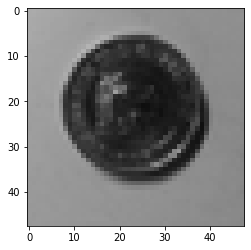

In [ ]:
### Reshape image 

# Convert features to 2D Numpy array
img_reshape = np.reshape(np.array(img), (height, width))

# Show the ground-truth label
print("Actual label:", labels[true_idx])

# Display image (make sure we're looking at the right thing)
plt.imshow(img_reshape, cmap='gray', vmin=0.0, vmax=1.0)

In [ ]:
### The Keras model expects images in a 4D array with dimensions (sample, height, width, channel)

# Add extra dimension to the image (placeholder for color channels)
img_0 = img_reshape.reshape(img_reshape.shape + (1,))

# Keras expects more than one image (in Numpy array), so convert image(s) to such array
images = np.array([img_0])

# Print dimensions of inference input
print(images.shape)

(1, 48, 48, 1)


In [ ]:
### Do a forward pass (inference) with the test image and print the predicted probabilities

# Inference
preds = model.predict(images)

# Print out predictions
for i, pred in enumerate(preds[0]):
  print(labels[i] + ": " + str(pred))

background: 0.0757088
half: 0.041703824
one: 0.62233675
pointone: 0.23514266
two: 0.025107823


In [ ]:
### For either algorithm, we need to remove the Softmax activation function of the last layer
model.layers[-1].activation = None

## Saliency Map

In [ ]:
### Based on: https://github.com/keisen/tf-keras-vis/blob/master/tf_keras_vis/saliency.py
def get_saliency_map(img_array, model, class_idx):

  # Gradient calculation requires input to be a tensor
  img_tensor = tf.convert_to_tensor(img_array)

  # Do a forward pass of model with image and track the computations on the "tape"
  with tf.GradientTape(watch_accessed_variables=False, persistent=True) as tape:

    # Compute (non-softmax) outputs of model with given image
    tape.watch(img_tensor)
    outputs = model(img_tensor, training=False)

    # Get score (predicted value) of actual class
    score = outputs[:, true_idx]

  # Compute gradients of the loss with respect to the input image
  grads = tape.gradient(score, img_tensor)  

  # Finds max value in each color channel of the gradient (should be grayscale for this demo)
  grads_disp = [np.max(g, axis=-1) for g in grads]

  # There should be only one gradient heatmap for this demo
  grad_disp = grads_disp[0]

  # The absolute value of the gradient shows the effect of change at each pixel
  # Source: https://christophm.github.io/interpretable-ml-book/pixel-attribution.html
  grad_disp = tf.abs(grad_disp)

  # Normalize to between 0 and 1 (use epsilon, a very small float, to prevent divide-by-zero error)
  heatmap_min = np.min(grad_disp)
  heatmap_max = np.max(grad_disp)
  heatmap = (grad_disp - heatmap_min) / (heatmap_max - heatmap_min + tf.keras.backend.epsilon())

  return heatmap.numpy()

In [ ]:
### Generate saliency map for the given input image
saliency_map = get_saliency_map(images, model, true_idx)

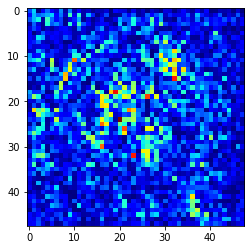

In [ ]:
### Draw map
plt.imshow(saliency_map, cmap='jet', vmin=0.0, vmax=1.0)

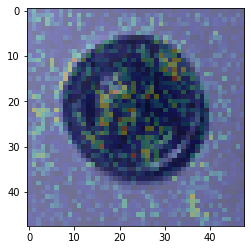

In [ ]:
### Overlay the saliency map on top of the original input image
idx = 0
ax = plt.subplot()
ax.imshow(images[idx,:,:,0], cmap='gray', vmin=0.0, vmax=1.0)
ax.imshow(saliency_map, cmap='jet', alpha=0.25)

## Grad-CAM

In [ ]:
### This function comes from https://keras.io/examples/vision/grad_cam/
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

  # First, we create a model that maps the input image to the activations
  # of the last conv layer as well as the output predictions
  grad_model = tf.keras.models.Model(
      [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
  )

  # Then, we compute the gradient of the top predicted class for our input image
  # with respect to the activations of the last conv layer
  with tf.GradientTape() as tape:
      last_conv_layer_output, preds = grad_model(img_array)
      if pred_index is None:
          pred_index = tf.argmax(preds[0])
      class_channel = preds[:, pred_index]

  # This is the gradient of the output neuron (top predicted or chosen)
  # with regard to the output feature map of the last conv layer
  grads = tape.gradient(class_channel, last_conv_layer_output)

  # This is a vector where each entry is the mean intensity of the gradient
  # over a specific feature map channel
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the top predicted class
  # then sum all the channels to obtain the heatmap class activation
  last_conv_layer_output = last_conv_layer_output[0]
  heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
  heatmap = tf.squeeze(heatmap)

  # The absolute value of the gradient shows the effect of change at each pixel
  # Source: https://christophm.github.io/interpretable-ml-book/pixel-attribution.html
  heatmap = tf.abs(heatmap)

  # Normalize to between 0 and 1 (use epsilon, a very small float, to prevent divide-by-zero error)
  heatmap_min = np.min(heatmap)
  heatmap_max = np.max(heatmap)
  heatmap = (heatmap - heatmap_min) / (heatmap_max - heatmap_min + tf.keras.backend.epsilon())

  return heatmap.numpy()

In [ ]:
### We need to tell Grad-CAM where to find the last convolution layer

# Print out the layers in the model
for layer in model.layers:
  print(layer, layer.name)

# Go backwards through the model to find the last convolution layer
last_conv_layer = None
for layer in reversed(model.layers):
    if 'conv' in layer.name:
        last_conv_layer = layer.name
        break

# Give a warning if the last convolution layer could not be found
if last_conv_layer is not None:
  print("Last convolution layer found:", last_conv_layer)
else:
  print("ERROR: Last convolution layer could not be found. Do not continue.")

<keras.layers.convolutional.Conv2D object at 0x7fde4ff3bb10> conv2d
<keras.layers.pooling.MaxPooling2D object at 0x7fde3f004f10> max_pooling2d
<keras.layers.convolutional.Conv2D object at 0x7fde3f07b4d0> conv2d_1
<keras.layers.pooling.MaxPooling2D object at 0x7fde3f07db50> max_pooling2d_1
<keras.layers.core.dropout.Dropout object at 0x7fde3f080610> dropout
<keras.layers.core.flatten.Flatten object at 0x7fde3f080f90> flatten
<keras.layers.core.dense.Dense object at 0x7fde3f096910> y_pred
Last convolution layer found: conv2d_1


In [ ]:
### Generate class activation heatmap
heatmap = make_gradcam_heatmap(images, model, last_conv_layer)

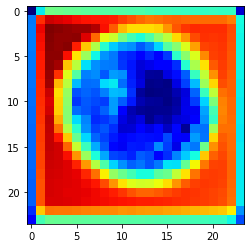

In [ ]:
### Draw map
plt.imshow(heatmap, cmap='jet', vmin=0.0, vmax=1.0)

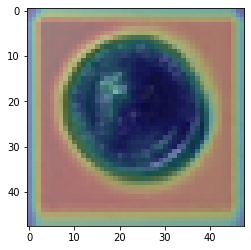

In [ ]:
### Overlay the saliency map on top of the original input image

# The heatmap is a lot smaller than the original image, so we upsample it
big_heatmap = cv2.resize(heatmap, dsize=(height, width), interpolation=cv2.INTER_CUBIC)

# Draw original image with heatmap superimposed over it
idx = 0
ax = plt.subplot()
ax.imshow(images[idx,:,:,0], cmap='gray', vmin=0.0, vmax=1.0)
ax.imshow(big_heatmap, cmap='jet', alpha=0.25)